# Report
---

Description of methods and results.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import logging
import numpy as np
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [14]:
from qrl_navigation.model import DuelingQNetwork
from qrl_navigation.replay_buffer import ReplayWeightedBuffer
from qrl_navigation.agent import WeightedAgent, Agent
from qrl_navigation.environment import BananaMazeEnv
from qrl_navigation.training import dqn_training
import torch
import pickle
import time

### Evaluation of trained model

In [49]:
meta = pickle.load(open('../experiments/dueling/meta.pickle', 'rb'))

In [50]:
meta['agent']

'Agent(state_size=37, action_size=4, fc_units=[64, 64], device="cuda", dueling=True)'

In [22]:
agent = eval(meta['agent'])

In [23]:
meta['model_path']

'../experiments/basic/model.pt'

In [ ]:
agent.load(meta['model_path'])

In [4]:
maze_env = BananaMazeEnv(train_mode=True)

DEBUG:unityagents:The true file name is Banana
DEBUG:unityagents:This is the launch string /home/adam/code/qrl_navigation/notebooks/../bin/unity_banana_maze/Banana.x86_64
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [18]:
state = maze_env.reset()
score = 0
for step in range(1000):
    action = agent.act(state, 0.01)
    next_state, reward, done = maze_env.step(action)
    agent.step(state, action, reward, next_state, done)
    state = next_state
    score += reward
    if reward != 0:
        print(f'Score update: {score}')
    time.sleep(0.05)
    if done:
        break
print(f'Final score is {score}')

Score update: -1.0
Score update: 0.0
Score update: 1.0
Score update: 2.0
Score update: 3.0
Score update: 4.0
Score update: 5.0
Score update: 6.0
Score update: 7.0
Score update: 8.0
Score update: 9.0
Score update: 10.0
Score update: 11.0
Score update: 12.0
Score update: 13.0
Score update: 14.0
Score update: 15.0
Final score is 15.0


In [19]:
maze_env.close()

### Comparison of score developement

In [63]:
meta_dueling = pickle.load(open('../experiments/dueling/meta.pickle', 'rb'))
meta_basic = pickle.load(open('../experiments/basic/meta.pickle', 'rb'))

data_dueling = pd.DataFrame({'scores': meta_dueling['scores'][:1000],
                             'iterations': range(len(meta_dueling['scores'][:1000]))
                            })

data_basic = pd.DataFrame({'scores': meta_basic['scores'],
                             'iterations': range(len(meta_basic['scores']))
                            })

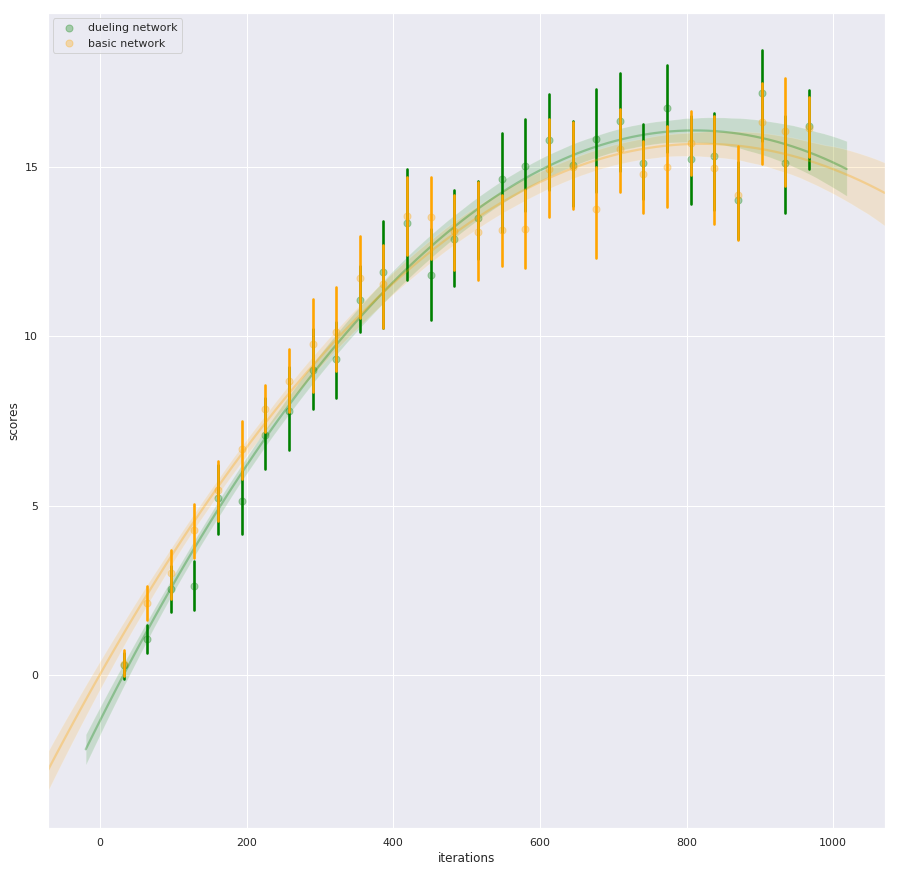

In [64]:
plt.figure(figsize=(15, 15))
ax = plt.gca()
sns.regplot(x='iterations', y='scores', data=data_dueling, ax=ax, order=2, x_bins=30, line_kws={'alpha':0.3}, scatter_kws={'alpha':0.3}, color='green', label='dueling network', )
sns.regplot(x='iterations', y='scores', data=data_basic, ax=ax, order=2, x_bins=30, line_kws={'alpha':0.3}, scatter_kws={'alpha':0.3}, color='orange', label='basic network')

plt.legend()